In [1]:
import tensorflow as tf

IMG_SIZE   = (224, 224)   # EfficientNet expects 224×224
BATCH_SIZE = 16            # CPU friendly

D:\Artificial Intelligence\Practice -----\practice_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Artificial Intelligence\College project\skin_lesion_data\train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=42, 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Artificial Intelligence\College project\skin_lesion_data\test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",

    seed=42, 
)


Found 2242 files belonging to 8 classes.
Found 2540 files belonging to 8 classes.


In [3]:
masked_train_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Artificial Intelligence\College project\skin_lesion_data\masked_train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=42
)

masked_val_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Artificial Intelligence\College project\skin_lesion_data\masked_test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=42
)

Found 2242 files belonging to 8 classes.
Found 2540 files belonging to 8 classes.


In [4]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [5]:
import matplotlib.pyplot as plt

In [6]:
for images, labels in train_ds.take(1):
    print(images.shape)

(16, 224, 224, 3)


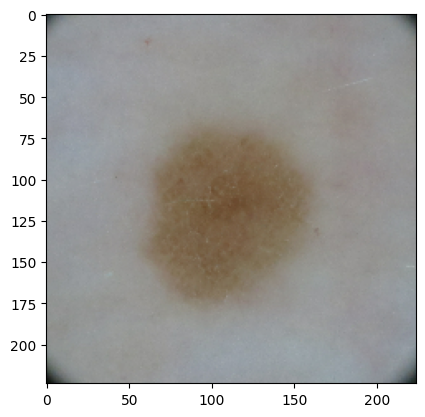

In [7]:
for image,image_label in train_ds.take(1):
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.show()

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(1)
val_ds   = val_ds.prefetch(1)
masked_train_ds   = masked_train_ds.prefetch(1)
masked_val_ds     = masked_val_ds.prefetch(1)

In [9]:
from tensorflow.keras import layers

data_aug_phase1 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.15),
    layers.RandomBrightness(0.1),
])

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = train_ds.element_spec[1].shape[-1]

inputs = tf.keras.Input(shape=(224, 224, 3))

base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=inputs
)

base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = data_augmentation(inputs)

x = tf.keras.applications.efficientnet.preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs, name="EfficientNet")


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
for layer in base_model.layers:
    print(f"{layer.name}\t=\t{layer.trainable}")

input_layer	=	False
rescaling	=	False
normalization	=	False
rescaling_1	=	False
stem_conv_pad	=	False
stem_conv	=	False
stem_bn	=	False
stem_activation	=	False
block1a_dwconv	=	False
block1a_bn	=	False
block1a_activation	=	False
block1a_se_squeeze	=	False
block1a_se_reshape	=	False
block1a_se_reduce	=	False
block1a_se_expand	=	False
block1a_se_excite	=	False
block1a_project_conv	=	False
block1a_project_bn	=	False
block2a_expand_conv	=	False
block2a_expand_bn	=	False
block2a_expand_activation	=	False
block2a_dwconv_pad	=	False
block2a_dwconv	=	False
block2a_bn	=	False
block2a_activation	=	False
block2a_se_squeeze	=	False
block2a_se_reshape	=	False
block2a_se_reduce	=	False
block2a_se_expand	=	False
block2a_se_excite	=	False
block2a_project_conv	=	False
block2a_project_bn	=	False
block2b_expand_conv	=	False
block2b_expand_bn	=	False
block2b_expand_activation	=	False
block2b_dwconv	=	False
block2b_bn	=	False
block2b_activation	=	False
block2b_se_squeeze	=	False
block2b_se_reshape	=	False


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

phase1_es = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history_phase1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8,
    callbacks=[phase1_es]
)

Epoch 1/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 127s 857ms/step - accuracy: 0.3265 - loss: 1.7915 - val_accuracy: 0.3169 - val_loss: 1.7660
Epoch 2/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 109s 774ms/step - accuracy: 0.4398 - loss: 1.5047 - val_accuracy: 0.3524 - val_loss: 1.7020
Epoch 3/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 111s 792ms/step - accuracy: 0.4661 - loss: 1.4142 - val_accuracy: 0.3594 - val_loss: 1.6950
Epoch 4/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 109s 774ms/step - accuracy: 0.5022 - loss: 1.3384 - val_accuracy: 0.3476 - val_loss: 1.7472
Epoch 5/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 107s 761ms/step - accuracy: 0.5236 - loss: 1.3032 - val_accuracy: 0.3457 - val_loss: 1.8026
Epoch 6/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 107s 761ms/step - accuracy: 0.5321 - loss: 1.2536 - val_accuracy: 0.3398 - val_loss: 1.8868


## Phase2

In [14]:
base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False

In [15]:
for layer in base_model.layers:
    print(f"{layer.name}\t=\t{layer.trainable}")

input_layer	=	False
rescaling	=	False
normalization	=	False
rescaling_1	=	False
stem_conv_pad	=	False
stem_conv	=	False
stem_bn	=	False
stem_activation	=	False
block1a_dwconv	=	False
block1a_bn	=	False
block1a_activation	=	False
block1a_se_squeeze	=	False
block1a_se_reshape	=	False
block1a_se_reduce	=	False
block1a_se_expand	=	False
block1a_se_excite	=	False
block1a_project_conv	=	False
block1a_project_bn	=	False
block2a_expand_conv	=	False
block2a_expand_bn	=	False
block2a_expand_activation	=	False
block2a_dwconv_pad	=	False
block2a_dwconv	=	False
block2a_bn	=	False
block2a_activation	=	False
block2a_se_squeeze	=	False
block2a_se_reshape	=	False
block2a_se_reduce	=	False
block2a_se_expand	=	False
block2a_se_excite	=	False
block2a_project_conv	=	False
block2a_project_bn	=	False
block2b_expand_conv	=	False
block2b_expand_bn	=	False
block2b_expand_activation	=	False
block2b_dwconv	=	False
block2b_bn	=	False
block2b_activation	=	False
block2b_se_squeeze	=	False
block2b_se_reshape	=	False


In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "EfficientNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │          10,248 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,059,819 (15.49 MB)

 Trainable params: 2,060,952 (7.86 MB)

 Non-trainable params: 1,998,867 (7.63 MB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

phase2_es = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

history_phase2 = model.fit(
    masked_train_ds,
    validation_data=masked_val_ds,
    epochs=15,
    callbacks=[phase2_es]
)



Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 131s 866ms/step - accuracy: 0.3818 - loss: 1.6425 - val_accuracy: 0.3425 - val_loss: 1.8087
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 808ms/step - accuracy: 0.4938 - loss: 1.3513 - val_accuracy: 0.3752 - val_loss: 1.7458
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 812ms/step - accuracy: 0.5580 - loss: 1.2044 - val_accuracy: 0.3882 - val_loss: 1.6794
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 812ms/step - accuracy: 0.6182 - loss: 1.0754 - val_accuracy: 0.4075 - val_loss: 1.6644
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 814ms/step - accuracy: 0.6427 - loss: 0.9888 - val_accuracy: 0.4083 - val_loss: 1.6596
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 813ms/step - accuracy: 0.6989 - loss: 0.8705 - val_accuracy: 0.4264 - val_loss: 1.6509
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 820ms/step - accuracy: 0.7310 - loss: 0.8038 - val_accuracy: 0.4063 - val_loss: 1.7583
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 117s 832ms/step - accuracy: 0.7658 -